# Linear Rrgression

## Contents 

* Introduction
* Algorithm
* Advantages and Disadvantages
* Application on dataset
* Error Analysis
* Conclusion


***

## Introduction

When modeling the relationship between a scalar answer and one or more explanatory factors, linear regression is a linear method (also known as dependent and independent variables). Simple linear regression is used when there is only one explanatory variable, and multiple linear regression is used when there are numerous variables. As opposed to multivariate linear regression, which predicts numerous correlated dependent variables as opposed to a single scalar variable, this phrase is more specific.

A linear regression model describes the relationship between a dependent variable $y$, and one or more independent variables $X$. The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables. Continuous predictor variables are also called covariates, and categorical predictor variables are also called factors. The matrix X of observations on predictor variables is usually called the design matrix.


***

## Algorithm



A multiple linear regression model is

$y = \beta_{0}+\beta_{1}X_{i1}+\beta_{2}X_{i2}+\cdots+\beta_{p}X_{p1}+\epsilon_{i}$ 
$i=1,\cdots,n$

where
$y_{i}$ is the ith response.

$\beta_{k}$ is the kth coefficient, where $\beta_{0}$ is the constant term in the model. Sometimes, design matrices might include information about the constant term. However, fitlm or stepwiselm by default includes a constant term in the model, so you must not enter a column of 1s into your design matrix $X$.

$X_{ij}$ is the ith observation on the jth predictor variable, $j = 1,\cdots, p$.

$\epsilon_{i}$ is the ith noise term, that is, random error.

If a model includes only one predictor variable $(p = 1)$, then the model is called a simple linear regression model.

In general, a linear regression model can be a model of the form

$y_{i}=\beta_{0}+\Sigma_{k=1}^{K}\beta_{k}f_{k}(X_{i1},X_{i2},\cdots,X_{ip})$

$X$ can also be write as $X=(x_{1}^{T},x_{2}^{T},\cdots,x_{n}^{T})$, in which $x_{i}^{T} = (x_{i1},x_{i2},\cdots,x_{ip})$.$y=(y_{1},y_{2},\cdots,y_{n})$

In this way, the linear regression model can be written as the following:

$y_{i}=\beta_{0}+\Sigma_{j=1}^{p}\beta_{j}x_{ij}+\epsilon_{i}$

A simple way is write the linear model as:
$y=X\beta+\epsilon$, in which $X=(1,x_{1},x_{2},\cdots,x_{n})$

Residual sum of squares RSS is 

$RSS = \Sigma_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}x_{i1}-\cdots-\beta_{p}x_{ip})^2$

$MSE = \frac{1}{n}RSS$

The least square estimates of $\beta $ is $(X'X)^{-1}X'y$







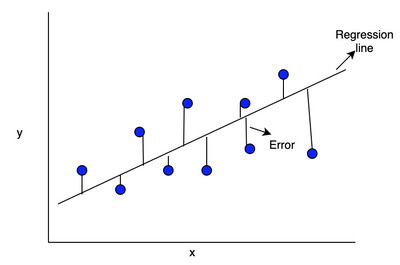

### Advantages
Linear Regression is a very simple algorithm that can be implemented very easily to give satisfactory results.Furthermore, these models can be trained easily and efficiently even on systems with relatively low computational power when compared to other complex algorithms.Linear regression has a considerably lower time complexity when compared to some of the other machine learning algorithms.The mathematical equations of Linear regression are also fairly easy to understand and interpret.Hence Linear regression is very easy to master.

Linear regression fits linearly seperable datasets almost perfectly and is often used to find the nature of the relationship between variables.

Overfitting is a situation that arises when a machine learning model fits a dataset very closely and hence captures the noisy data as well.This negatively impacts the performance of model and reduces its accuracy on the test set.
Regularization is a technique that can be easily implemented and is capable of effectively reducing the complexity of a function so as to reduce the risk of overfitting.


### Disadvantages

Outliers of a data set are anomalies or extreme values that deviate from the other data points of the distribution.Data outliers can damage the performance
of a machine learning model drastically and can often lead to models with low accuracy.

Very often the inputs are not independent of each other and hence any multicollinearity must be removed before applying linear regression.


***

## Application On Dataset

In [3]:
import numpy as np 
import pandas as pd 
from IPython.display import Image 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Prepare Data

In [4]:
data = pd.read_csv('/Users/liusiling/Desktop/semester1/615/House_Price.csv')
data2 = data

In [5]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
for i in range(0,len(data2),1):
    if data2['airport'][i]=='YES':
        data2['airport'][i]=1
    if data2['airport'][i]=='NO':
        data2['airport'][i]=0
        
    if data2['waterbody'][i]=='None':
        data2['waterbody'][i]=0
    elif data2['waterbody'][i]=='Lake':
        data2['waterbody'][i]=1
    elif data2['waterbody'][i]=='River':
        data2['waterbody'][i]=2
    else:
        data2['waterbody'][i]=3
        

/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_34709/1110475198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['airport'][i]=1
/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_34709/1110475198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['waterbody'][i]=2
/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_34709/1110475198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['a

In [8]:
# Split features X and y
data = data[['price','crime_rate','resid_area','air_qual','room_num','age','parks']]
X = data.drop(['price'],axis=1)
y=data['price']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)
print(len(X_train), len(X_test), len(y_train), len(y_test))


379 127 379 127


## Data visualization

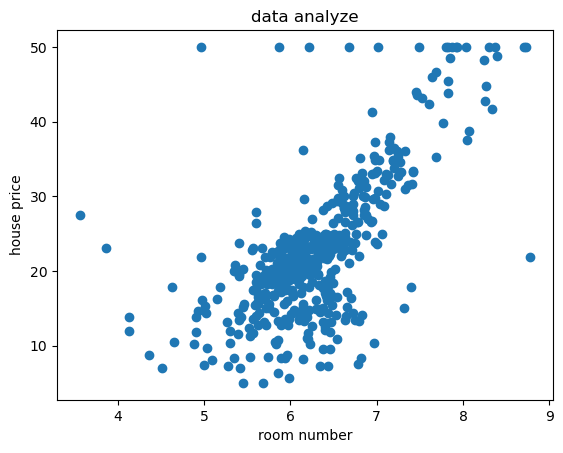

In [10]:
plt.scatter(data['room_num'],data['price'])
plt.title("data analyze")
plt.xlabel("room number")
plt.ylabel("house price")
  
plt.show()

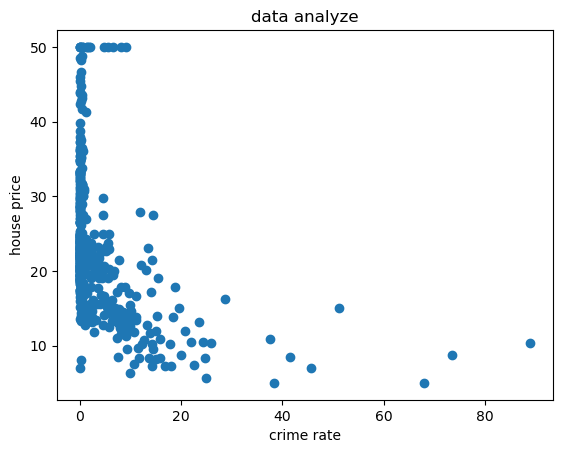

In [11]:
plt.scatter(data['crime_rate'],data['price'])
  
plt.title("data analyze")
plt.xlabel("crime rate")
plt.ylabel("house price")
  
plt.show()

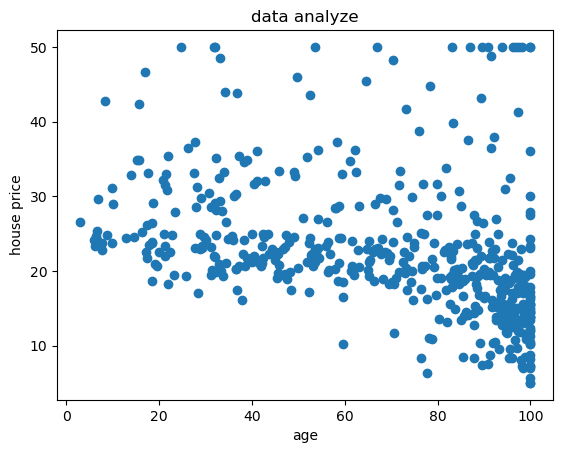

In [12]:
plt.scatter(data['age'],data['price'])
  
plt.title("data analyze")
plt.xlabel("age")
plt.ylabel("house price")
  
plt.show()

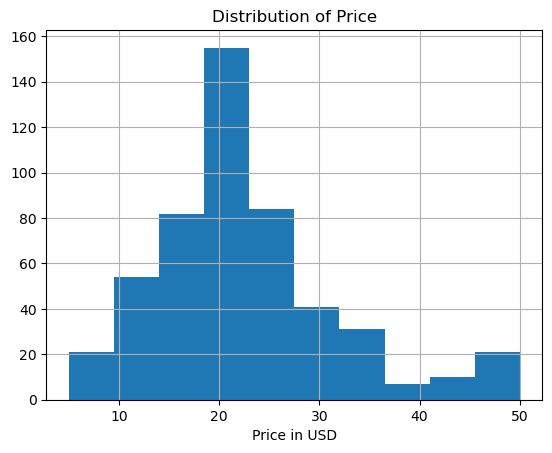

In [13]:
# View price distribution
data['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

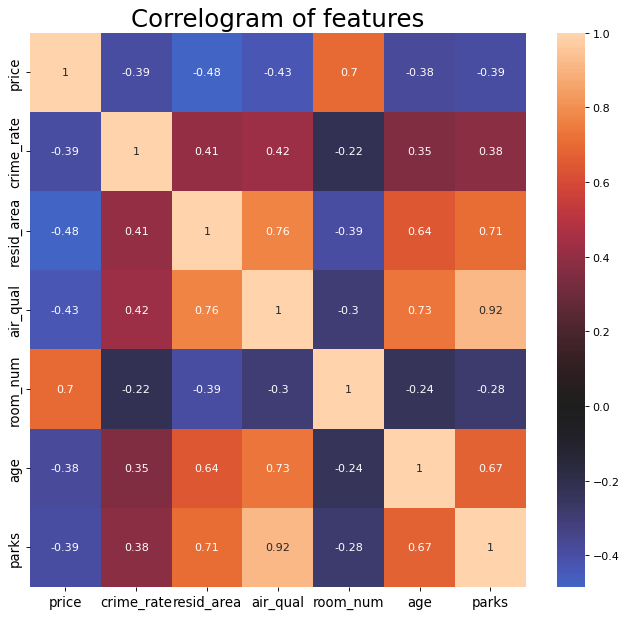

In [19]:
# Plot
plt.figure(figsize=(10,9), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, center=0, annot=True)

# Decorations
plt.yticks(fontsize=12)
plt.title('Correlogram of features', fontsize=22)
plt.xticks(fontsize=12)
plt.show()

## Categorical features

### Airport

We have a feature named 'airport', 'YES' refers to the existance of airport around, 'NO' refers to no existance of airport around. There might be a difference of price bewteen those with airport around and those without airport around.

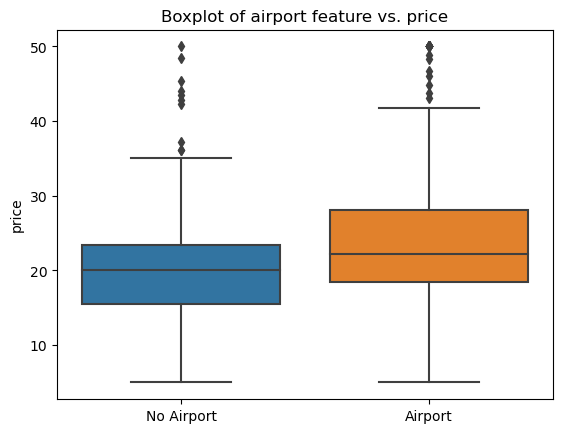

In [12]:
sns.boxplot(x = data2['airport'], y = data2['price'])
plt.title("Boxplot of airport feature vs. price")
plt.ylabel("price")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No Airport', 'Airport'))
plt.show()

In [13]:
amean =  data2[data2['airport'] == 1]['price'].mean()
namean = data2[data2['airport'] == 0]['price'].mean()
print(f"The mean house price for a house with airport is USD {round(amean,2)}")
print(f"The mean house price for a house without airport view is USD {round(namean,2)}")

The mean house price for a house with airport is USD 24.04
The mean house price for a house without airport view is USD 20.67


### Waterbody

We have a feature named 'waterbody', there are four levels: None, Lake, River, Lake and River.

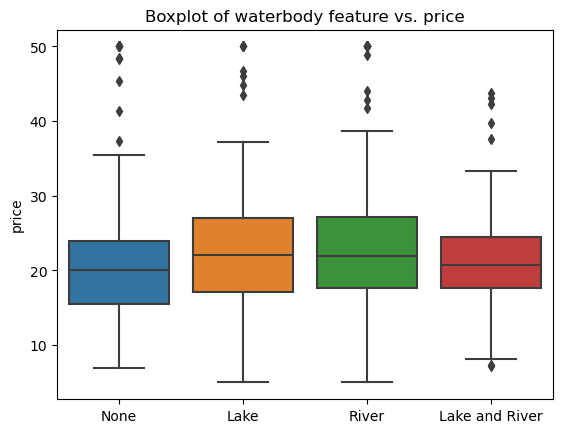

In [14]:
sns.boxplot(x = data2['waterbody'], y = data2['price'])
plt.title("Boxplot of waterbody feature vs. price")
plt.ylabel("price")
plt.xlabel(None)
plt.xticks(np.arange(4), ('None','Lake','River','Lake and River'))
plt.show()

In [15]:
nmean =  data2[data2['waterbody'] == 0]['price'].mean()
lmean = data2[data2['waterbody'] == 1]['price'].mean()
rmean =  data2[data2['waterbody'] == 2]['price'].mean()
bmean = data2[data2['waterbody'] == 3]['price'].mean()
print(f"The mean house price for a house with none watrebody is USD {round(nmean,2)}")
print(f"The mean house price for a house with lake is USD {round(lmean,2)}")
print(f"The mean house price for a house with river is USD {round(rmean,2)}")
print(f"The mean house price for a house with lake and river is USD {round(bmean,2)}")


The mean house price for a house with none watrebody is USD 21.46
The mean house price for a house with lake is USD 23.21
The mean house price for a house with river is USD 23.4
The mean house price for a house with lake and river is USD 21.68


## Train The Linear Regression Model

In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
# Create linear regression model
lm = LinearRegression()

# Fit data
lm.fit(X_train, y_train)


scores = cross_val_score(
            lm, 
            X_train,
            y_train,
            cv=20,
            scoring="neg_mean_squared_error"
)
lm_score =lm.score(X_train, y_train)
lm_score

0.5624880745277397

## Model Definition


If we write linear regression mpdel as $y=X\beta+\epsilon$, in which $X=(1,x_{1},x_{2},\cdots,x_{n})$

Then the least square estimates of $\beta $ is $(X'X)^{-1}X'y$

We can use this equation to compute the best estimator.

In [18]:
class lr():
    def __init__(self):
        self.X = None
        self.y = None
        self.betahat=None
        self.yhat = None
        self.n = None
        self.p = None
        self.bias = None
        
    def fit(self,X,y,bias):
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
            
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        betahat = np.linalg.inv(X.T @ X) @ X.T @ y
        self.betahat = betahat
        self.yhat = X @ betahat
        
    
    def predict(self, x):
        if self.bias:
            ones_column = np.ones((x.shape[0], 1))
            x = np.append(ones_column, x, axis=1)
        return x @ self.beta_hat
    
    def SSE(self):
        return (self.y-self.yhat).T@(self.y-self.yhat)
    
    def MSE(self):
        return self.SSE()/(self.n-self.p)
    
    def SSR(self):
        return (self.yhat - np.mean(self.y)).T @ (self.yhat - np.mean(self.y))

    def SST(self):
        return (self.y-np.mean(self.yhat)).T@(self.y-np.mean(self.yhat))
    
    def MSR(self):
        return self.SSR()/(self.p-1)
    
    def R_2(self):
        return 1 - self.SSE()/self.SST()
                                
    

## Fit on the data with bias
        

In [19]:
model = lr()
model.fit(X_train,y_train,bias=True)

Make predictions:

In [20]:
model.betahat

array([-12.27766433,  -0.19358946,  -0.15323406,  -1.45342647,
         7.25609838,  -0.03202636, -20.7154801 ])

In [21]:
model.yhat

array([23.50547884, 19.1598026 , 27.31199097, 15.36046049, 27.76574966,
       26.31755745, 21.53438052, 26.65231009, 35.47307375, 22.03298523,
       20.96319678,  0.04285419, 21.05389898, 14.62754429, 32.2298037 ,
       13.01843657, 21.06666639, 26.02888572, 18.23630521, 12.54691521,
       20.07214298, 16.71239533, 29.26602092, 28.58480489, 18.7919304 ,
       24.39747826,  6.87904398, 24.08003385, 22.42597267, 29.397409  ,
       19.75197452, 19.41268261, 20.98216641, 20.20511957, 32.12364819,
       18.50483789, 25.35256313, 23.22626765, 31.27426406, 26.75115849,
       19.23586971, 19.22500367, 20.93490135, 27.62584398, 19.04185845,
       27.29641753, 29.832594  , 20.21521627, 16.66689957, 27.31047883,
       18.28749952, 23.72557656, 24.24305878, 21.75247342, 26.30923185,
       13.23728178, 18.34081096, 14.33067368, 23.25999117, 23.58914316,
       21.16562647, 27.14966415, 20.23749861, 13.76861265, 20.30917281,
       23.20602159, 29.01716962, 25.45210478, 25.64659034, 20.46

In [22]:
print(f"SSE:{model.SSE()}")
print(f"MSE:{model.MSE()}")
print(f"SSR:{model.SSR()}")
print(f"MSR:{model.MSR()}")
print(f"R^2:{model.R_2()}")

SSE:11944.069123924251
MSE:32.10771269872111
SSR:15355.916153120826
MSR:2559.319358853471
R^2:0.5624880745277397


## Fit on the data without bias

In [23]:
model = lr()
model.fit(X_train,y_train,bias=False)

In [24]:
model.betahat

array([-1.77485838e-01, -2.53728898e-01, -1.22273535e+00,  6.04003026e+00,
       -2.50412810e-02, -4.10682240e+01])

In [25]:
model.yhat

array([24.68437973, 18.24432286, 27.53592789, 15.20641074, 27.92913302,
       27.0462229 , 22.45306264, 26.83512649, 33.8880066 , 21.06146947,
       21.91617952,  2.62668655, 21.74209389, 14.00329498, 29.66615353,
       13.13252399, 20.33051845, 24.45068312, 19.97659375, 12.58253064,
       20.62942119, 16.25591593, 29.19754346, 28.45380589, 19.93550917,
       25.09185908,  7.72764702, 23.09694634, 23.46785822, 28.85245851,
       18.87052341, 18.63978045, 21.21143011, 19.05385504, 31.80740171,
       17.77691998, 26.10472734, 23.95715535, 30.44956199, 24.78892424,
       19.91884827, 20.4241019 , 21.79378607, 27.94132954, 18.57297834,
       28.09258058, 29.73852247, 19.19223652, 16.50236569, 27.57423988,
       17.92595246, 24.3260534 , 25.08638613, 22.88996798, 26.25611337,
       14.00069137, 17.92339823, 14.18264723, 23.37758884, 24.39687881,
       21.23667698, 27.26632651, 21.08947178, 13.86148543, 19.75465316,
       22.86339478, 29.20582589, 26.28301978, 26.54626526, 21.08

## Error Analysis

The effectiveness of regression algorithms can be assessed in a variety of ways:

The Mean Squared Error

Mean Absolute Error

$R^2$ 

### The Mean Squared Error

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

### Mean Absolute Error

Mean Absolute Error is a model evaluation metric used with regression models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.

### $R^2$ 

R-Squared is the ratio of the sum of squares regression (SSR) and the sum of squares total (SST). Sum of Squares Regression (SSR) represents the total variation of all the predicted values found on the regression line or plane from the mean value of all the values of response variables. The sum of squares total (SST) represents the total variation of actual values from the mean value of all the values of response variables. R-squared value is used to measure the goodness of fit or best-fit line. 

In [26]:
print(f"SSE:{model.SSE()}")
print(f"MSE:{model.MSE()}")
print(f"SSR:{model.SSR()}")
print(f"MSR:{model.MSR()}")
print(f"R^2:{model.R_2()}")

SSE:12204.013455931276
MSE:32.7185347344002
SSR:14143.929748629262
MSR:2828.7859497258523
R^2:0.5529856653949197


## Conclusion

The regression model with bias is better than the regression model without bias by comparing their error.